In [20]:
import matplotlib.pyplot as plt 

In [18]:
import seaborn as sns

In [ ]:
import pandas as pd   # for data manipulation and analysis
import numpy as np    # for numerical operations
from sklearn.model_selection import train_test_split # for splitting data into training and testing sets
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler # for encoding categorical variables and scaling numerical variables
from sklearn.impute import SimpleImputer # for handling missing values
from sklearn.pipeline import Pipeline # for building a pipeline of data preprocessing and modeling steps
from sklearn.compose import ColumnTransformer # for applying different transformations to different columns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score
import xgboost as xgb # for using the XGBoost library
import lightgbm as lgb # for using the LightGBM library
from numpy import log # for logarithmic transformations
from math import sqrt # for calculating the root mean squared error



# Import the training dataset

In [2]:
df = pd.read_csv('train.csv')

##View the data table heads 

In [4]:
df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


## the shape of the dataset

In [7]:
df.shape

(90615, 10)

## check the data types

In [9]:
df.dtypes

id                  int64
Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Whole weight.1    float64
Whole weight.2    float64
Shell weight      float64
Rings               int64
dtype: object

## any missing values


In [11]:
df.isna().sum()
missing_values_count = df.isnull().sum()
print(missing_values_count)


id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64


In [16]:
df.describe()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,45307.000000,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,26158.441658,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,22653.500000,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,45307.000000,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,67960.500000,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,90614.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### inspect the height value more. Why is there a zero value?

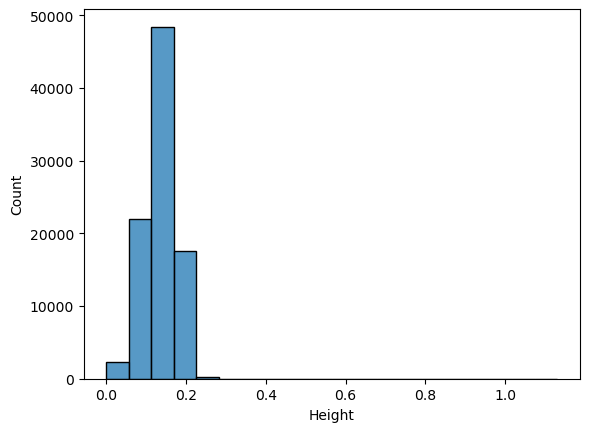

In [21]:
sns.histplot(data=df, x='Height', bins=20)
plt.show()

In [26]:
#what are the zero values?
zero_height_rows = df[df['Height'] == 0]
print(zero_height_rows)

          id Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
7025    7025   I   0.315     0.230     0.0        0.1340          0.0545   
14208  14208   I   0.430     0.340     0.0        0.3440          0.1880   
32078  32078   M   0.470     0.355     0.0        0.5785          0.2965   
52324  52324   I   0.315     0.230     0.0        0.1340          0.0530   
70295  70295   I   0.430     0.340     0.0        0.4060          0.2035   
90295  90295   M   0.430     0.325     0.0        0.3335          0.1350   

       Whole weight.2  Shell weight  Rings  
7025           0.0245        0.3505      8  
14208          0.0705        0.1050      8  
32078          0.1550        0.1360      7  
52324          0.0375        0.3505      7  
70295          0.0960        0.1230      7  
90295          0.0585        0.1050     10  


### in the analsys of the height ananomly ive identifed 6 attri. with the height of zero.

scater plots will give me more insights into this unusal relationships

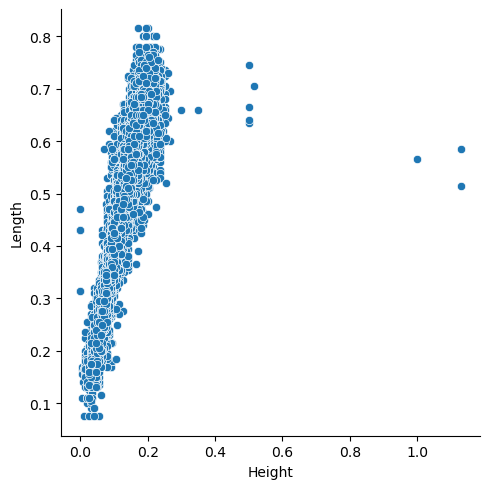

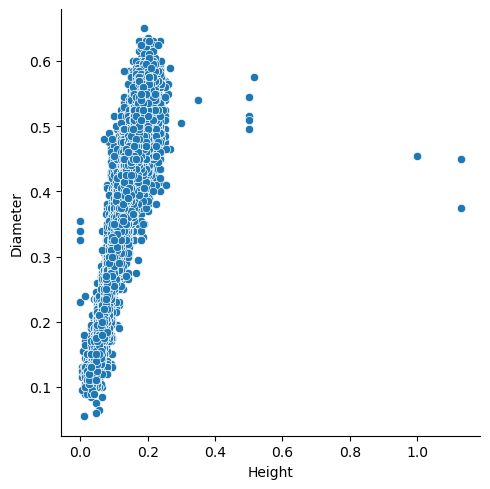

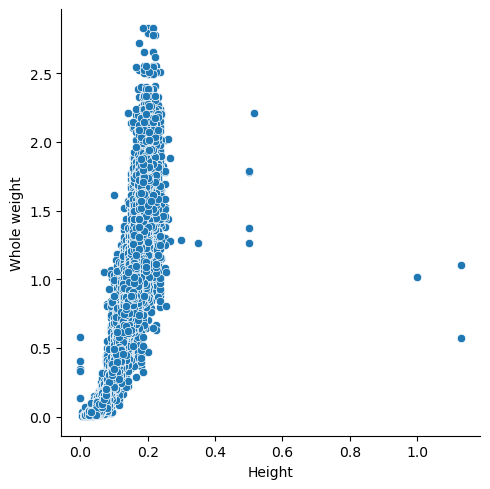

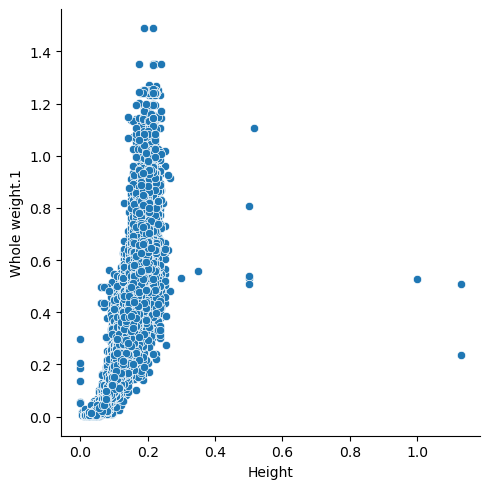

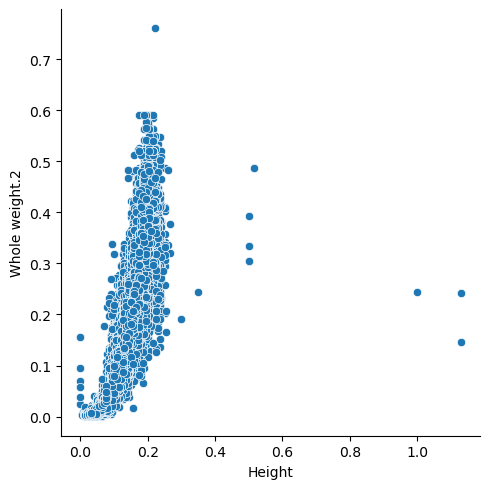

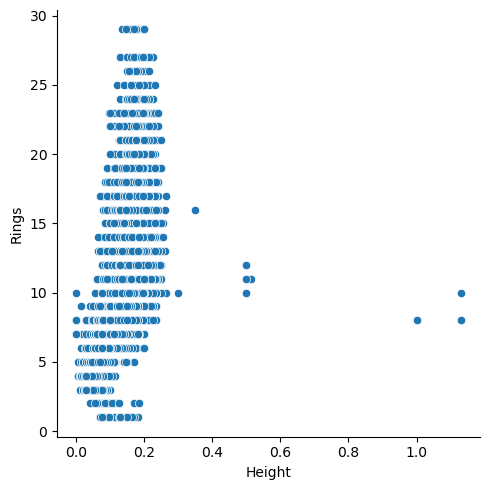

In [60]:
# Create scatter plots
sns.relplot(x='Height', y='Length', data=df, kind='scatter')
sns.relplot(x='Height', y='Diameter', data=df, kind='scatter')
sns.relplot(x='Height', y='Whole weight', data=df, kind='scatter')
sns.relplot(x='Height', y='Whole weight.1', data=df, kind='scatter')
sns.relplot(x='Height', y='Whole weight.2', data=df, kind='scatter')
sns.relplot(x='Height', y='Rings', data=df, kind='scatter')


### it can be assumes that the height of zero can be attributed to enviromental consditions or biological factors however more examination is need

Dealing with multiple attributes representing the same measurement, in this case, the three weight attributes (Whole weight, Whole weight.1, and Whole weight.2)...my aim is to gain insights into the data's underlying structure and identify the most suitable weight feature for your analysis

### The strong correlation between 'Height' and 'Rings' suggests that 'Height' could be an important predictor variable for predicting the number of rings in abalones.

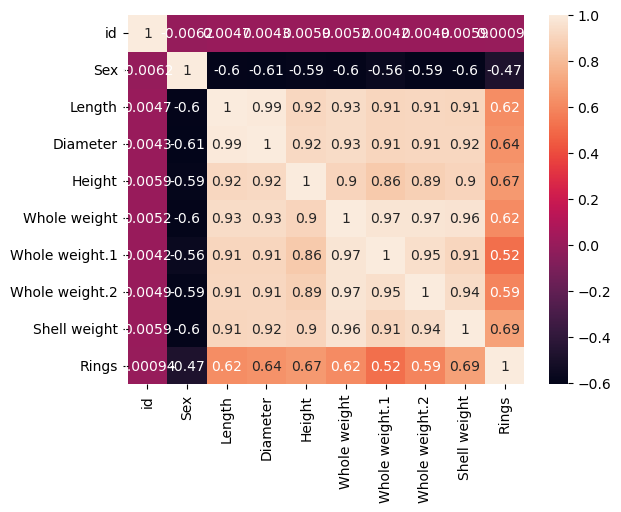

In [59]:
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0, 'I':2})
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()


/tmp/ipykernel_8186/3348907194.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


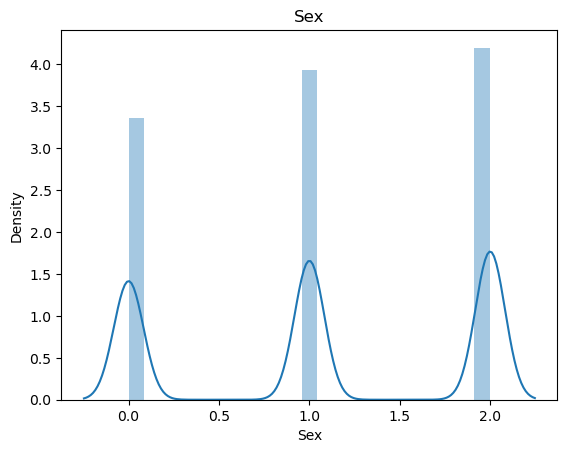

/tmp/ipykernel_8186/3348907194.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


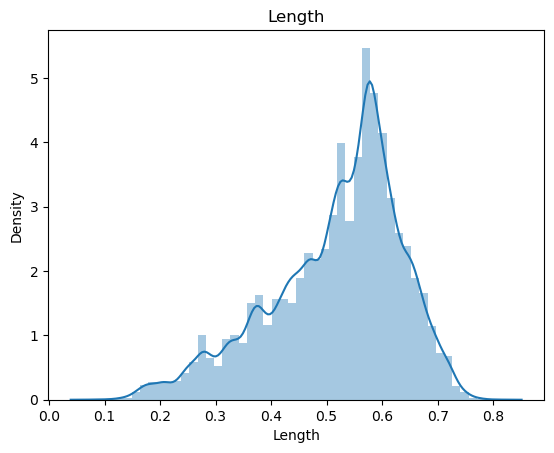

/tmp/ipykernel_8186/3348907194.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


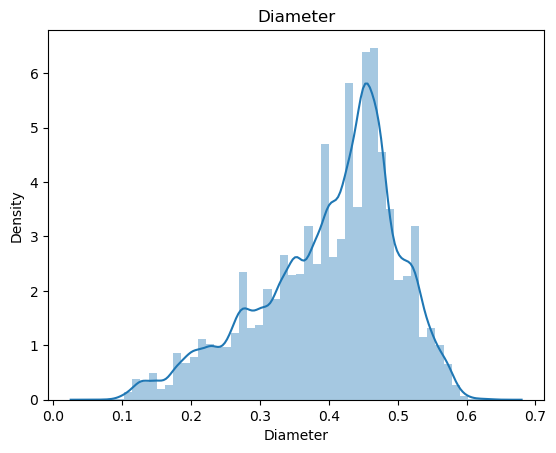

/tmp/ipykernel_8186/3348907194.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


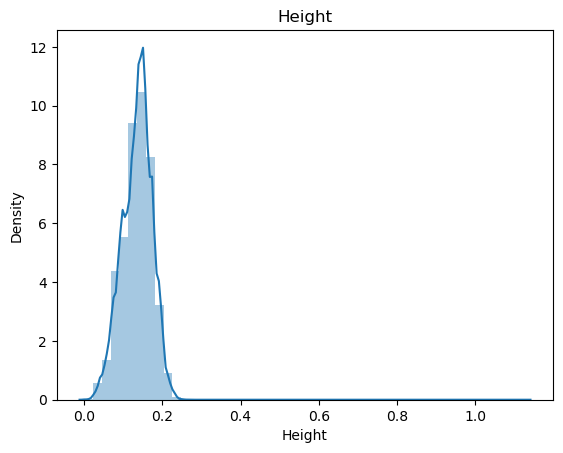

/tmp/ipykernel_8186/3348907194.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


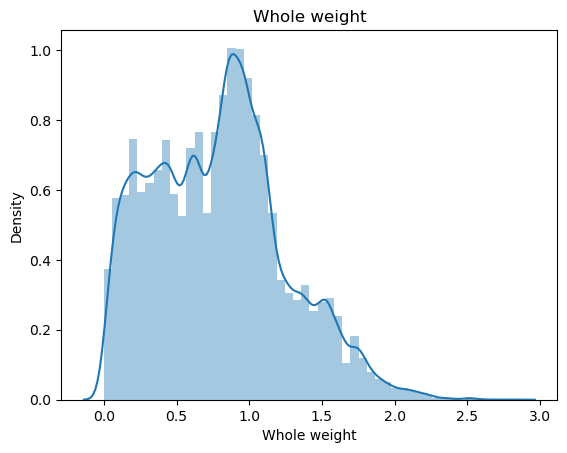

/tmp/ipykernel_8186/3348907194.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


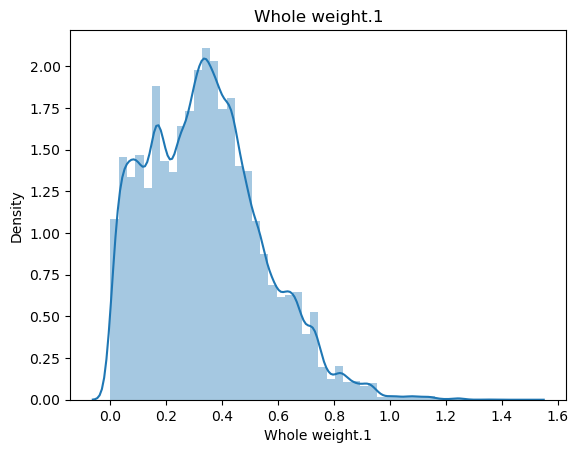

/tmp/ipykernel_8186/3348907194.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


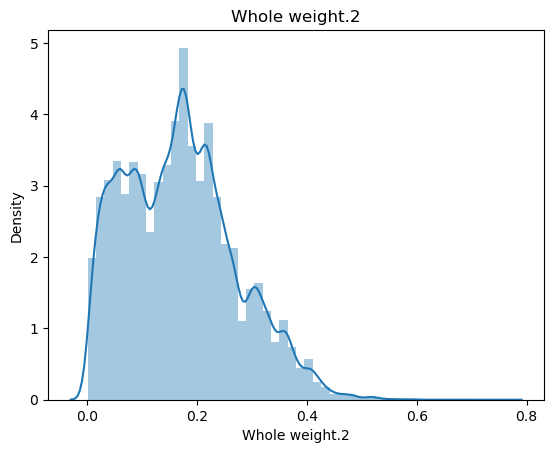

/tmp/ipykernel_8186/3348907194.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


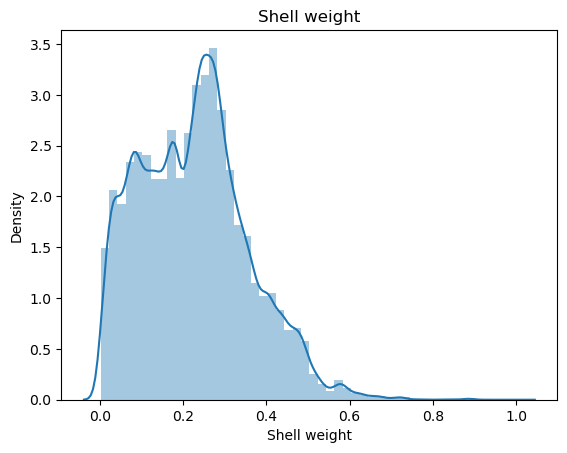

/tmp/ipykernel_8186/3348907194.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


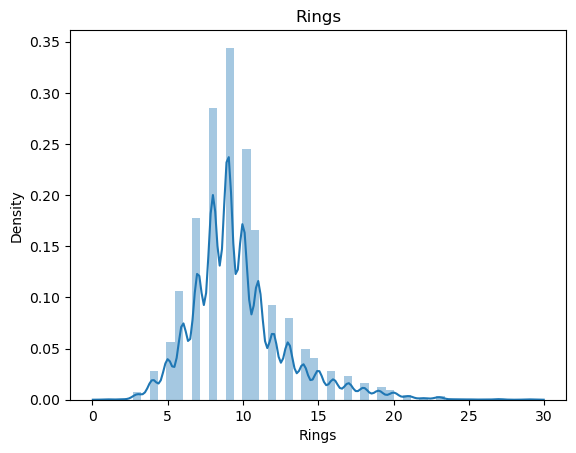

In [63]:
    for col in df.columns[1:]:  # assuming the 'id' column is the first one
        sns.distplot(df[col])
        plt.title(col)
        plt.show()


### What distribution patterns were observed in the abalone dataset's variables, such as height, density, and rings?
Conclusion: The distribution plots revealed that height and density, as well as density and rings, appeared to follow a normal distribution. This indicates that most abalone specimens have measurements close to the mean, with fewer specimens having extreme values.

### What implications do the observed normal distributions have on the choice of predictive models, preprocessing techniques, feature selection, model evaluation, and validation?
Conclusion: The normal distribution in some variables supports the use of models such as linear regression, logistic regression, and discriminant analysis. Additionally, it suggests that preprocessing techniques like log transformations or normalization may not be necessary for these variables. However, it's essential to consider the distributions of other variables in the dataset to make final decisions on model selection, preprocessing, and evaluation methods.

### How might the observed relationships between variables, such as height and density, influence the creation of predictive models?
Conclusion: The relationship between height, density, and other variables can be exploited to build accurate predictive models. Including variables with strong relationships can improve model performance but may introduce multicollinearity issues. Analyzing these relationships can help you select the most informative features and understand the underlying patterns in the data.

### What additional analyses could be conducted to further investigate the relationships between variables and their potential impacts on predictive modeling?
Conclusion: Further analyses, such as hypothesis testing, correlation analysis, and principal component analysis (PCA), can provide deeper insights into the relationships between variables and help identify latent patterns in the data. These findings can be used to refine the feature selection process and optimize predictive models.

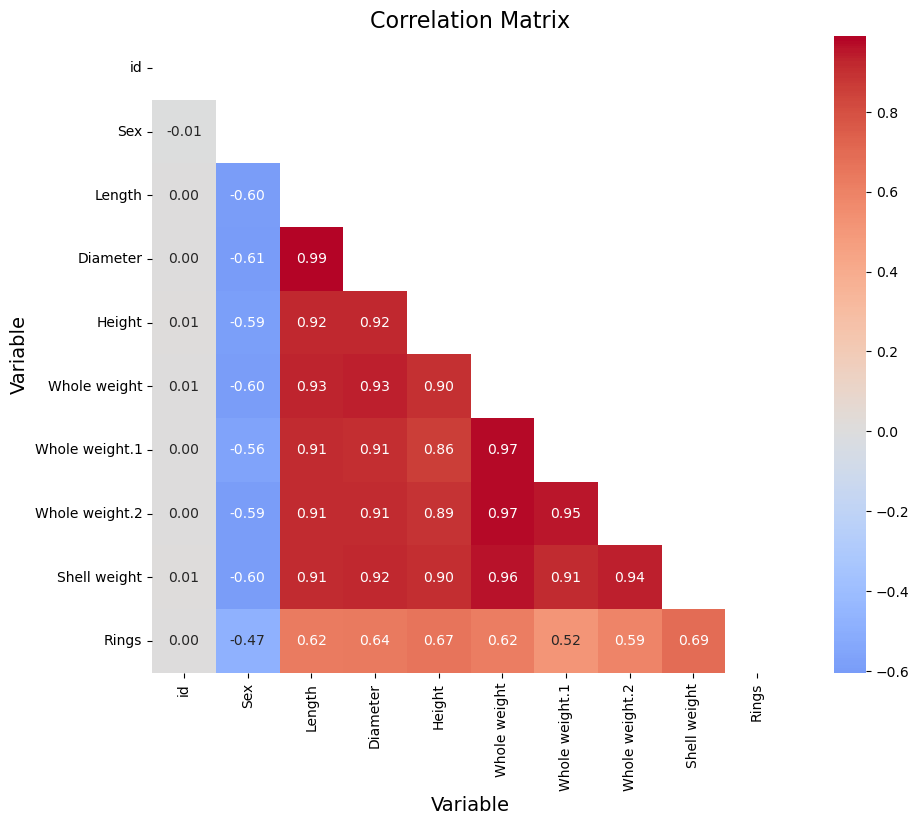

In [65]:
# Calculate Pearson correlation coefficients for all pairs of variables
correlation_matrix = df.corr("pearson")

# Generate a mask for the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Visualize the correlation matrix using a Seaborn heatmap
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.heatmap(correlation_matrix, mask=mask, cmap="coolwarm", center=0, annot=True, square=True, fmt=".2f", ax=ax)
ax.set_xlabel("Variable", fontsize=14)
ax.set_ylabel("Variable", fontsize=14)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

In [86]:
df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,0,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,1,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,2,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9
